In [1]:
# Load the dataset
import pandas as pd
insurance_data = pd.read_csv('/content/insurance.csv')

# Display basic information about the dataset
print(insurance_data.info())
print(insurance_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [3]:
import numpy as np
# 1. Creating Vectors (using columns from the dataset)
age_vector = insurance_data['age'].values
bmi_vector = insurance_data['bmi'].values
expenses_vector = insurance_data['expenses'].values
# 2. Creating Factors (categorical data converted to unique levels)
sex_factor = pd.Categorical(insurance_data['sex'])
smoker_factor = pd.Categorical(insurance_data['smoker'])
region_factor = pd.Categorical(insurance_data['region'])

# 3. Creating Lists (combining different data types)
insurance_list = [age_vector, sex_factor, bmi_vector, smoker_factor, expenses_vector]
# 4. Creating a Matrix (combining numeric vectors into a 2D array)
age_bmi_matrix = np.column_stack((age_vector, bmi_vector))
# 5. Creating a Data Frame (subsetting the original DataFrame)
insurance_subset = insurance_data[['age', 'bmi', 'expenses']]

# Output to verify the creations
{
      "Vectors": {
              "Age Vector": age_vector[:5],
              "BMI Vector": bmi_vector[:5],
              "Expenses Vector": expenses_vector[:5]
                                  },
      "Factors": {
              "Sex Factor Levels": sex_factor.categories.tolist(),
              "Smoker Factor Levels": smoker_factor.categories.tolist(),
              "Region Factor Levels": region_factor.categories.tolist()
                                                                  },
       "List Sample": insurance_list[:2],
       "Matrix Sample": age_bmi_matrix[:5],
       "Data Frame Sample": insurance_subset.head().to_dict()
                                                                              }
















{'Vectors': {'Age Vector': array([19, 18, 28, 33, 32]),
  'BMI Vector': array([27.9, 33.8, 33. , 22.7, 28.9]),
  'Expenses Vector': array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86])},
 'Factors': {'Sex Factor Levels': ['female', 'male'],
  'Smoker Factor Levels': ['no', 'yes'],
  'Region Factor Levels': ['northeast',
   'northwest',
   'southeast',
   'southwest']},
 'List Sample': [array([19, 18, 28, ..., 18, 21, 61]),
  ['female', 'male', 'male', 'male', 'male', ..., 'male', 'female', 'female', 'female', 'female']
  Length: 1338
  Categories (2, object): ['female', 'male']],
 'Matrix Sample': array([[19. , 27.9],
        [18. , 33.8],
        [28. , 33. ],
        [33. , 22.7],
        [32. , 28.9]]),
 'Data Frame Sample': {'age': {0: 19, 1: 18, 2: 28, 3: 33, 4: 32},
  'bmi': {0: 27.9, 1: 33.8, 2: 33.0, 3: 22.7, 4: 28.9},
  'expenses': {0: 16884.92, 1: 1725.55, 2: 4449.46, 3: 21984.47, 4: 3866.86}}}

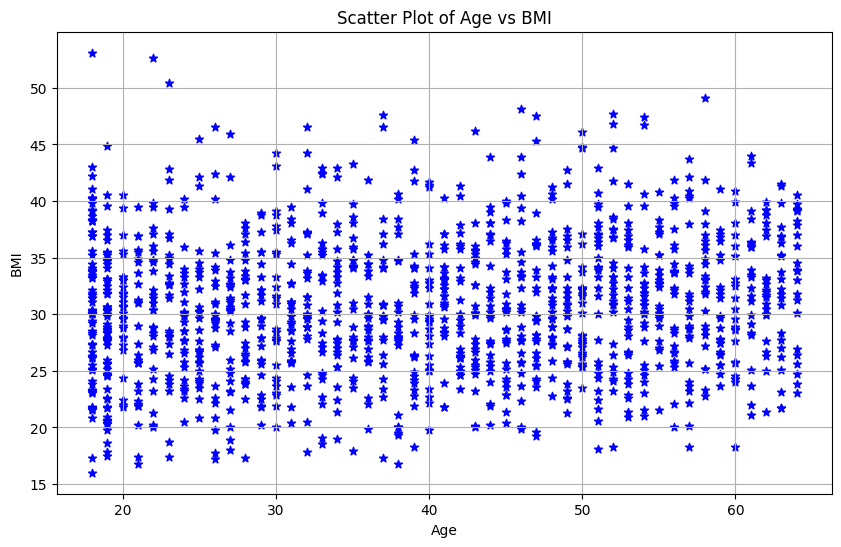

In [24]:
import matplotlib.pyplot as plt
# b) Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(insurance_data['age'], insurance_data['bmi'], marker='*', color='blue')
plt.title('Scatter Plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)


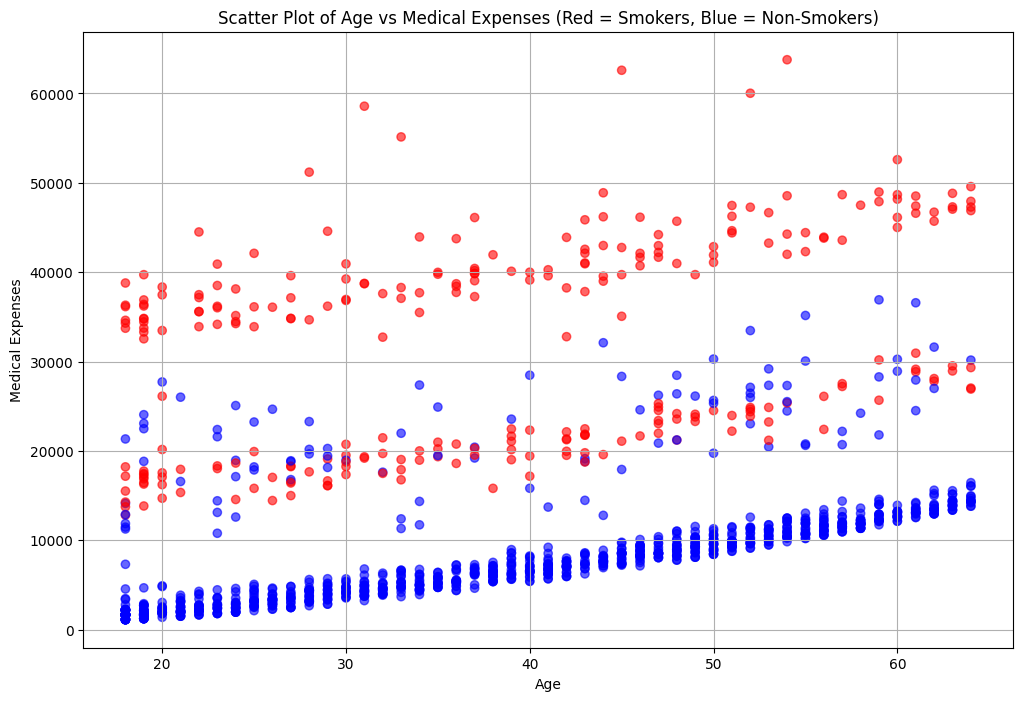

In [13]:
# c) Filter the data and update the plots
# 1. Scatter plot between age and smoking
plt.figure(figsize=(12, 8))
colors = insurance_data['smoker'].apply(lambda x: 'red' if x == 'yes' else 'blue')
plt.scatter(insurance_data['age'], insurance_data['expenses'], c=colors, alpha=0.6)
plt.title('Scatter Plot of Age vs Medical Expenses (Red = Smokers, Blue = Non-Smokers)')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.grid(True)
plt.show()

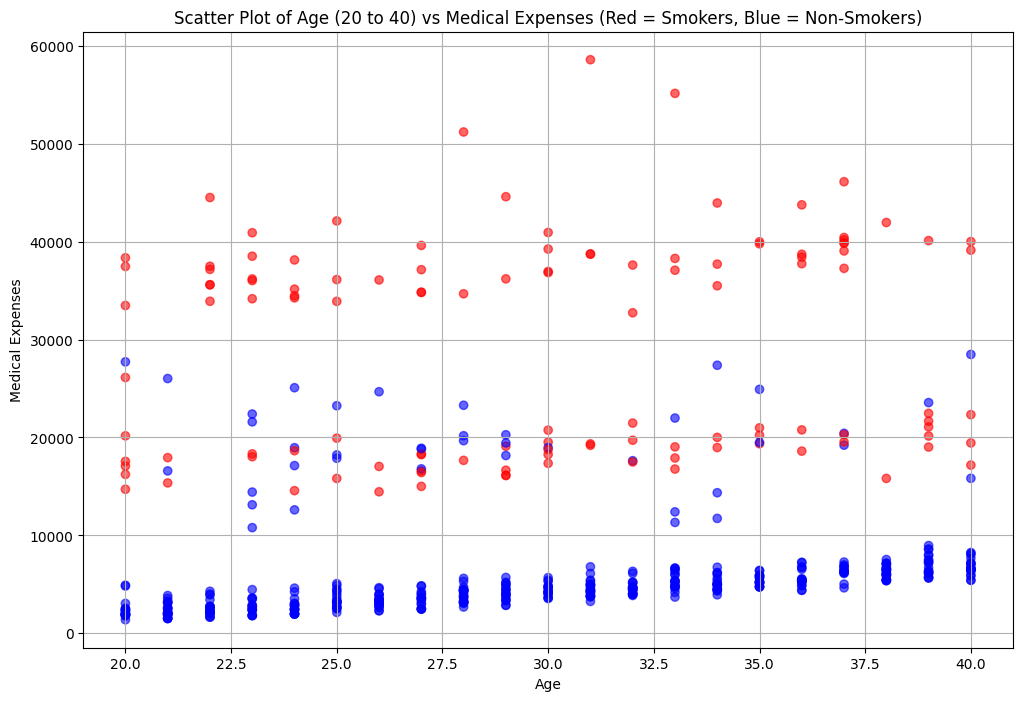

In [16]:
#Plot a scatter plot between age(20 to 40) and smoking
filtered_data = insurance_data[(insurance_data['age'] >= 20) & (insurance_data['age'] <= 40)]
plt.figure(figsize=(12, 8))
colors = filtered_data['smoker'].apply(lambda x: 'red' if x == 'yes' else 'blue')
plt.scatter(filtered_data['age'], filtered_data['expenses'], c=colors, alpha=0.6)
plt.title('Scatter Plot of Age (20 to 40) vs Medical Expenses (Red = Smokers, Blue = Non-Smokers)')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.grid(True)
plt.show()










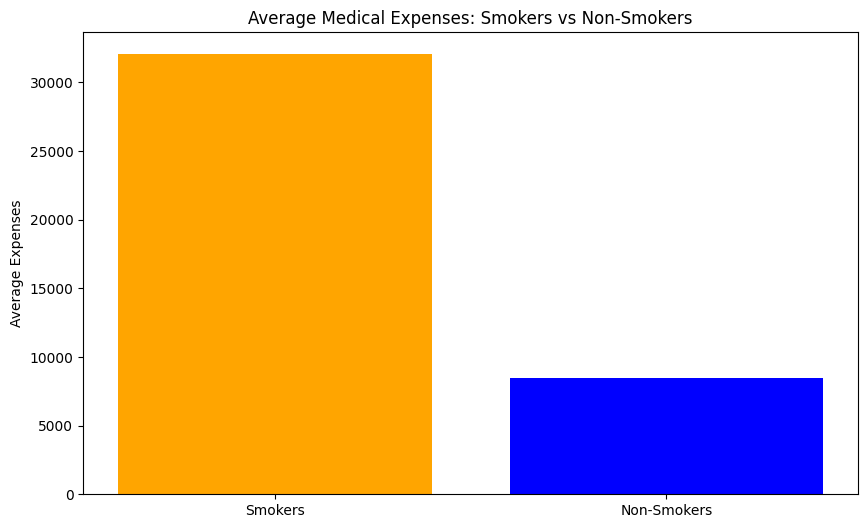

In [8]:
# 3. Find expenses of smokers and non-smokers (plot)
smoker_expenses = insurance_data[insurance_data['smoker'] == 'yes']['expenses'].mean()
non_smoker_expenses = insurance_data[insurance_data['smoker'] == 'no']['expenses'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Smokers', 'Non-Smokers'], [smoker_expenses, non_smoker_expenses], color=['orange', 'blue'])
plt.title('Average Medical Expenses: Smokers vs Non-Smokers')
plt.ylabel('Average Expenses')
plt.show()

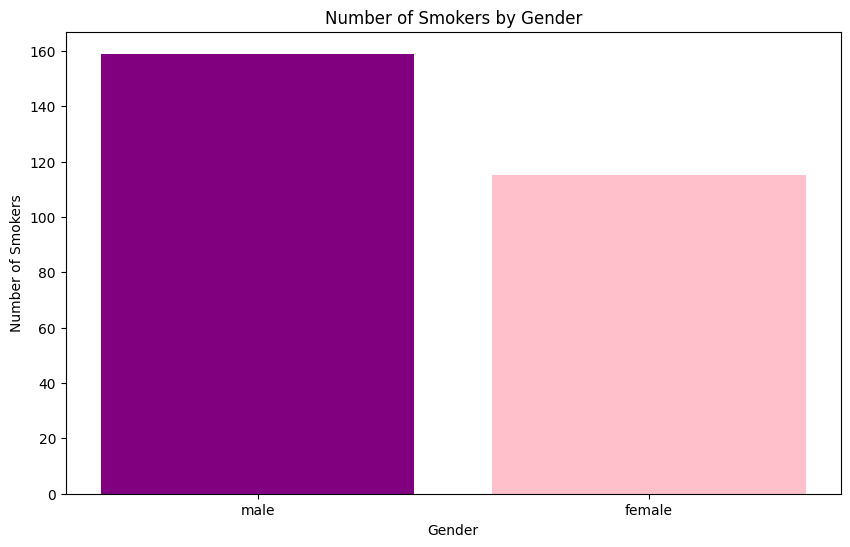

In [9]:
# 4. Find the number of smokers gender-wise (plot)
smokers_gender = insurance_data[insurance_data['smoker'] == 'yes']['sex'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(smokers_gender.index, smokers_gender.values, color=['purple', 'pink'])
plt.title('Number of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.show()

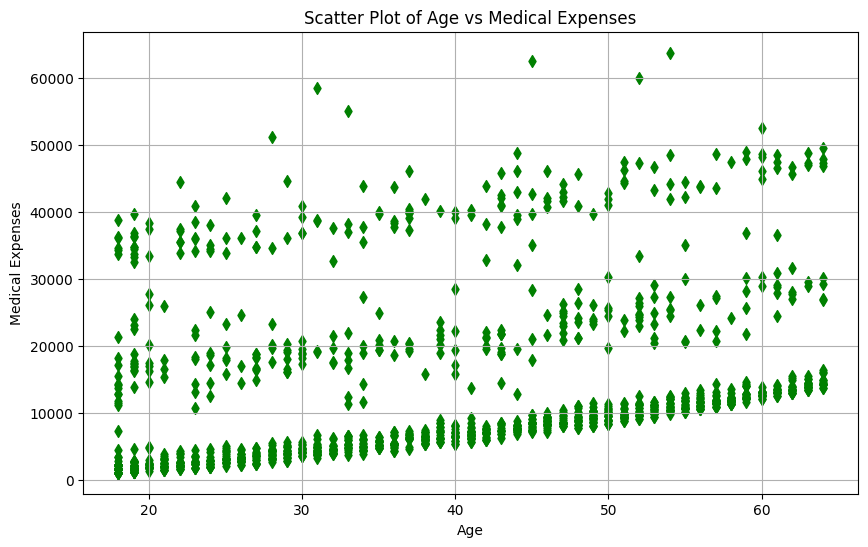

In [20]:
# 5. Scatter plot between age and expenses
plt.figure(figsize=(10, 6))
plt.scatter(insurance_data['age'], insurance_data['expenses'], marker='d', color='green')
plt.title('Scatter Plot of Age vs Medical Expenses')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.grid(True)
plt.show()